In [0]:
#ライブラリの読み込み
%matplotlib inline
import sys
import os
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [0]:
#グラフの設定
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = (10,10)

In [0]:
#ファイルの読み込み
train_url = 'https://raw.githubusercontent.com/TakatoMatsumoto/data_policy_studies/master/chapter_1/dataset/train.csv'
test_url = 'https://raw.githubusercontent.com/TakatoMatsumoto/data_policy_studies/master/chapter_1/dataset/test.csv'
train_csv = pd.read_csv(train_url, low_memory=False)
test_csv = pd.read_csv(test_url, low_memory=False)

In [16]:
train_csv.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,4239400730,152000,3,1.00,1090,3264,1.0,0,0,4,6,1090,0,1969,0,98092,47.3155,-122.182,1090,3330
1,5016001060,650000,2,2.50,1740,2500,2.0,0,2,3,8,1210,530,1994,0,98112,47.6220,-122.300,1640,2500
2,7212650200,350000,3,2.50,2180,15484,1.0,0,0,3,8,2180,0,1992,0,98003,47.2688,-122.309,2090,10775
3,3876312570,350500,3,2.25,1870,7200,1.0,0,0,3,7,1390,480,1975,0,98072,47.7340,-122.174,1830,7876
4,8562901010,505000,2,3.00,2770,10800,1.5,0,0,5,8,1910,860,1984,0,98074,47.6082,-122.057,2140,10800


In [17]:
test_csv.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7788400180,3,1.00,1660,11200,1.0,0,0,3,7,1660,0,1957,0,98056,47.5121,-122.168,1380,10875
1,7550800945,2,1.00,1450,4500,1.5,0,0,4,7,1450,0,1921,0,98107,47.6739,-122.396,1470,5000
2,1912100875,2,2.25,1370,1248,2.0,0,0,3,7,1200,170,2000,0,98102,47.6399,-122.320,1800,3360
3,723049301,2,1.75,1660,11437,2.0,0,0,3,7,1660,0,1958,1992,98146,47.4899,-122.339,1290,7860
4,1778500595,5,1.50,1720,4000,1.5,0,0,3,7,1520,200,1925,0,98112,47.6197,-122.287,2280,4000


In [0]:
#説明変数の読み込み
X_trainvalid = train_csv.drop(["price", "id"], axis=1)
X_test = test_csv.drop(["id"], axis=1)

#train dataとtest dataの結合（データの取り扱いを簡単にしています）
X_traintest_temp = pd.concat([X_trainvalid, X_test], axis=0)

In [0]:
#説明変数の選択
#デフォルトではsqft_basementとconditionを用いて予測を行なっている
#X_traintest = X_traintest_temp[['sqft_basement','condition']] 


#ここに価格に影響を与えると分析した要素を入力してください
X_traintest = X_traintest_temp[['sqft_living', 'grade', 'bedrooms']]


#train dataとtest dataの分割
X_train = X_traintest.iloc[:train_csv.shape[0], :]
X_test = X_traintest.iloc[train_csv.shape[0]:, :]

#目的変数の読み込み（log変換を行なっています）
y_train = np.log(train_csv["price"].values)

#線形回帰モデルの構築とモデルによる予測
model = LinearRegression().fit(X_train, y_train)
test_pred = np.exp(model.predict(X_test))

In [0]:
#提出ファイルの出力
sub_df = pd.DataFrame({"id":test_csv["id"].values,"price":test_pred})
sub_df.to_csv("submission.csv", index=False)


In [30]:
sub_df

,id,price
0,7788400180,3.786555e+05
1,7550800945,3.686220e+05
2,1912100875,3.618423e+05
3,723049301,3.870293e+05
4,1778500595,3.675289e+05
...,...,...
4283,6613000935,1.485417e+06
4284,4140090110,5.034130e+05
4285,273900030,3.734202e+05
4286,2597520790,6.328065e+05


RMSLE: 0.348737


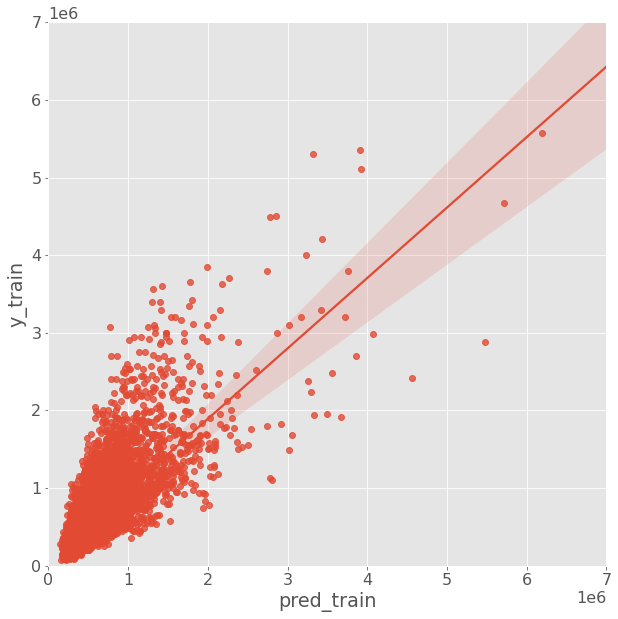

In [31]:
#物件価格の予測と正解データの散布図
#Training dataの物件価格と、Training dataの予測価格を表示しています
train_pred = np.exp(model.predict(X_train))
data = pd.DataFrame({"pred_train": train_pred,"y_train": np.exp(y_train)})
sns.regplot(x="pred_train", y="y_train", data=data)
plt.xlim(0, 7000000)
plt.ylim(0, 7000000)

#RMSLEを表示します
print("RMSLE: %f" % np.sqrt(mean_squared_error(np.log(train_pred), (y_train))))

説明変数を変えるとグラフと誤差RMSLEがどうなるか確認してみましょう。  

In [32]:
#線形回帰モデルの切片の表示
model.intercept_

11.255325763735549

In [33]:
#線形回帰モデルの各説明変数にかかる係数の表示
coef_df = pd.DataFrame(X_train.columns, columns=['Feature'])
coef_df['coefficient'] = pd.Series(model.coef_)
coef_df

,Feature,coefficient
0,sqft_living,0.000232
1,grade,0.181355
2,bedrooms,-0.021874
